In [147]:
from bs4 import BeautifulSoup
import pandas
import requests

The above code imports libraries like beautiful soup, pandas, and requests inorder to parse, analyze, manipulate and deal with http with python.

In [148]:
# LA Lakers
opened_webpage = requests.get("https://www.basketball-reference.com/teams/LAL/stats_per_game_totals.html")
bs = BeautifulSoup(opened_webpage.content, "html.parser")
table = bs.find("table")

data = []
headers = []

# Extract the header row
header_row = table.find("thead").find_all("th")
for header in header_row:
    seperated_headers = header.text.strip()
    headers.append(seperated_headers)

# Extract the data rows
data_rows = table.find("tbody").find_all("tr")
for row in data_rows:
    row_data = []
    first_column = row.find("th").text.strip()
    row_data.append(first_column)
    cells = row.find_all("td")
    for cell in cells:
        row_data.append(cell.text.strip())
    data.append(row_data)

# Create a pandas dataframe from the data
df = pandas.DataFrame(data, columns=headers)
print(headers)
print(data)


# New York Knicks
opened_webpage = requests.get("https://www.basketball-reference.com/teams/NYK/stats_per_game_totals.html")
bs = BeautifulSoup(opened_webpage.content, "html.parser")
table = bs.find("table")

data = []
headers = []

# Extract the header row
header_row = table.find("thead").find_all("th")
for header in header_row:
    seperated_headers = header.text.strip()
    headers.append(seperated_headers)

# Extract the data rows
data_rows = table.find("tbody").find_all("tr")
for row in data_rows:
    row_data = []
    first_column = row.find("th").text.strip()
    row_data.append(first_column)
    cells = row.find_all("td")
    for cell in cells:
        row_data.append(cell.text.strip())
    data.append(row_data)
print(data)
df_NYK = pandas.DataFrame(data, columns=headers)


# Golden State Warriors
opened_webpage = requests.get("https://www.basketball-reference.com/teams/GSW/stats_per_game_totals.html")
bs = BeautifulSoup(opened_webpage.content, "html.parser")
table = bs.find("table")

data = []
headers = []

# Extract the header row
header_row = table.find("thead").find_all("th")
for header in header_row:
    seperated_headers = header.text.strip()
    headers.append(seperated_headers)

# Extract the data rows
data_rows = table.find("tbody").find_all("tr")
for row in data_rows:
    row_data = []
    first_column = row.find("th").text.strip()
    row_data.append(first_column)
    cells = row.find_all("td")
    for cell in cells:
        row_data.append(cell.text.strip())
    data.append(row_data)
print(data)


df_GSW = pandas.DataFrame(data, columns=headers)

['Season', 'Lg', 'Tm', 'W', 'L', 'Finish', '', 'Age', 'Ht.', 'Wt.', '', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
[['2022-23', 'NBA', 'LAL', '29', '33', '5', '', '28.4', '6-5', '212', '', '62', '242.8', '43.1', '89.7', '.480', '10.5', '31.1', '.338', '32.6', '58.7', '.556', '20.2', '26.1', '.775', '9.8', '36.0', '45.8', '25.2', '6.4', '4.6', '14.2', '18.5', '116.9'], ['2021-22', 'NBA', 'LAL', '33', '49', '4', '', '30.2', '6-5', '221', '', '82', '243.7', '41.6', '88.8', '.469', '12.0', '34.5', '.347', '29.7', '54.3', '.546', '16.8', '23.0', '.732', '9.5', '34.5', '44.0', '24.0', '7.6', '5.2', '14.5', '20.2', '112.1'], ['2020-21', 'NBA', 'LAL', '42', '30', '3', '', '28.2', '6-6', '223', '', '72', '242.4', '40.6', '86.1', '.472', '11.1', '31.2', '.354', '29.6', '54.8', '.539', '17.2', '23.3', '.739', '9.7', '34.6', '44.2', '24.7', '7.8', '5.4', '15.2', '19.1', '109.5'], ['2019-20

The above block of code repeats the same process three times with different URLs. First, it reads the webpage and parse it with beautifulsoup. Then, it finds the table in the website and extracts the header row using the html tags. The extracted data goes into the headers lists. The data cells are extrated per row and goes into the data list. Thus, there are multiple lists in the data list. 

In [149]:
# Reset the index
df_NYK.reset_index(drop=True, inplace=True)
df_GSW.reset_index(drop=True, inplace=True)

# Merge
df = pandas.concat([df, df_NYK, df_GSW], ignore_index=True)

df

,Season,Lg,Tm,W,L,Finish,,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2022-23,NBA,LAL,29,33,5,,28.4,6-5,212,...,.775,9.8,36.0,45.8,25.2,6.4,4.6,14.2,18.5,116.9
1,2021-22,NBA,LAL,33,49,4,,30.2,6-5,221,...,.732,9.5,34.5,44.0,24.0,7.6,5.2,14.5,20.2,112.1
2,2020-21,NBA,LAL,42,30,3,,28.2,6-6,223,...,.739,9.7,34.6,44.2,24.7,7.8,5.4,15.2,19.1,109.5
3,2019-20,NBA,LAL,52,19,1,,29.5,6-6,224,...,.729,10.7,35.1,45.7,25.4,8.6,6.6,15.2,20.7,113.4
4,2018-19,NBA,LAL,37,45,4,,26.2,6-7,219,...,.699,10.2,36.4,46.6,25.6,7.5,5.4,15.7,20.7,111.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1950-51,NBA,PHW,40,26,1,,,,,...,.763,,,54.3,21.7,,,,25.9,85.4
234,1949-50,NBA,PHW,26,42,4,,,,,...,.700,,,,16.8,,,,26.0,73.3
235,1948-49,BAA,PHW,28,32,4,,,,,...,.717,,,,17.4,,,,24.3,83.7
236,1947-48,BAA,PHW,27,21,1,,,,,...,.714,,,,7.0,,,,19.5,73.4


With every additional dataframe, the index is reset inorder to combine all three dataframes into one. This prevents overlapping indexes. A new index is created for the concatenated dataframe.

In [150]:
df = df.drop("", axis=1)

There are two columns that are completely empty. The code above deletes empty columns from the dataframe.

In [151]:
df.describe()

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,238,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
unique,78,2,6,52,50,7,60,7,37,17,...,109,73,74,137,103,51,46,72,94,162
top,Season,NBA,NYK,37,25,1,,6-6,204,82,...,.717,,,,20.7,,,,25.0,100.4
freq,9,222,77,10,11,53,13,84,15,153,...,6,79,79,10,7,79,79,79,7,5


The above code gets the descriptive statistics for the data. Since my data has non-numeric values, it gives the count, unique, top and freq. Count is the total amount of data, unique is the number of distinct values, top is the most common value, and freq is the frequency of the most common value.

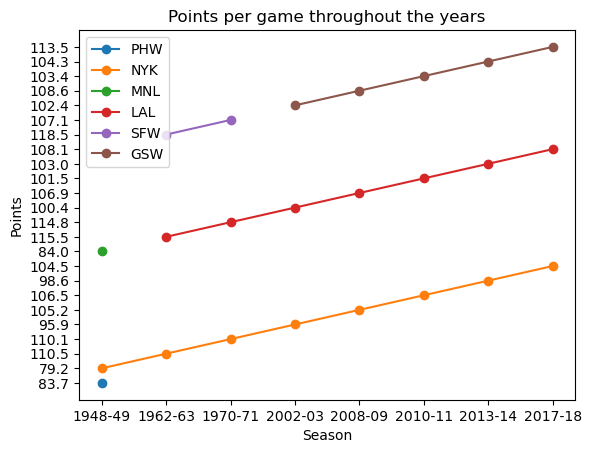

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Organize
df.dropna(inplace=True)
df = df.sort_values(by='Season')
df.reset_index(drop=True, inplace=True)

# Randomly select 8 seasons
seasons = df['Season'].unique()
random.shuffle(seasons)
random_seasons = seasons[:8]

# Get pts and season data
teams = df['Tm'].unique()
for team in teams:
    team_data = df.loc[df['Tm'] == team]
    pts = team_data['PTS']
    season = team_data['Season']
    
    # Plot only 8
    mask = np.isin(season, random_seasons)
  
        
    plt.plot(season[mask], pts[mask], label=team, marker='o')

    
# Add labels, legend, and title to the graph
plt.xlabel('Season')
plt.ylabel('Points')
plt.title('Points per game throughout the years')
plt.legend()

plt.show()

The above code creates a single line graph that contains the history of points per game for all three franchises. There are six total teams because NYK was first named PHW, LAL was first named MNL, and GSW was first named SFW. The y-axis is thus divided into three parts. The code first organizes the data by deleteing null enteries and sorting the data by season. Then, it creates a list of all unique teams and selects eight random seasons. Then, for every team, it extracts the points per game and season data. From the extracted data, only 8 randomn points are plotted. Labels are created and represented in the legend for each team.

In [153]:
df.to_csv("NBA franchise data_GSW,LAL,NYK.csv")

The version that is being saved as a csv file contains every change to the dataframe uptil the version where the data is sorted by season and the index is reset.